(493, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female          

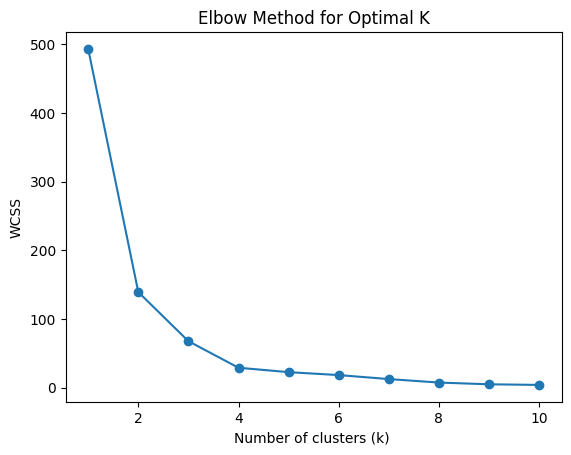

     name_of_city  total_graduates  Cluster
0               0            16287        1
1               1             8863        1
2               2            10565        1
3               3            19225        1
4               4            11902        1
..            ...              ...      ...
488           487            30656        1
489           488           109613        1
490           489            19363        1
491           490            29803        1
492           491            13511        1

[493 rows x 3 columns]


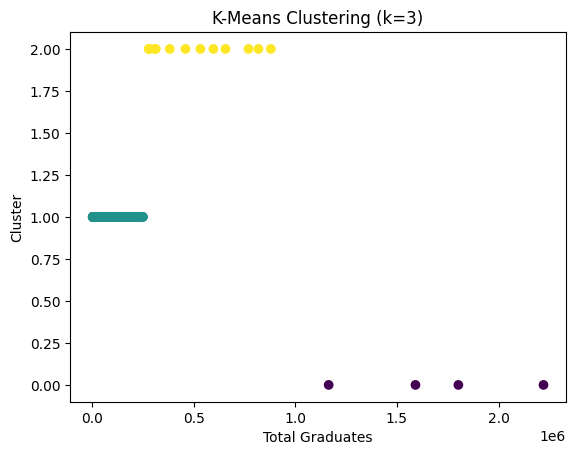

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("Cities_r2.csv")
print(df.shape)
print(df.info())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

x = df[['total_graduates']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k) ')
plt.ylabel('WCSS')
plt.show()

# -------- APPLY OPTIMAL K --------
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show results
print(df[['name_of_city', 'total_graduates', 'Cluster']])

# -------- VISUALIZE CLUSTERS --------
plt.scatter(df['total_graduates'], df['Cluster'], c=df['Cluster'])
plt.xlabel("Total Graduates")
plt.ylabel("Cluster")
plt.title("K-Means Clustering (k=3)")
plt.show()



(493, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female          

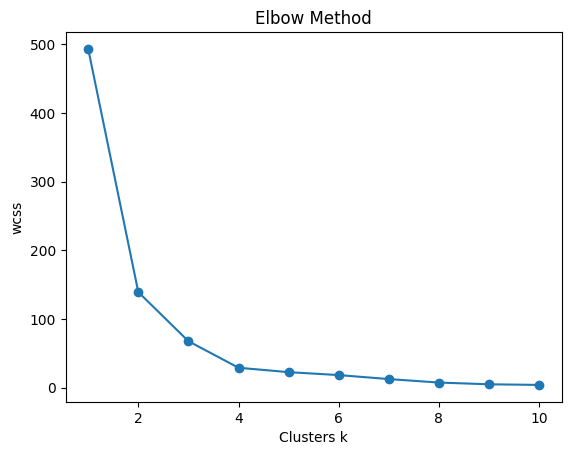

     name_of_city  total_graduates  Cluster
0               0            16287        1
1               1             8863        1
2               2            10565        1
3               3            19225        1
4               4            11902        1
..            ...              ...      ...
488           487            30656        1
489           488           109613        1
490           489            19363        1
491           490            29803        1
492           491            13511        1

[493 rows x 3 columns]


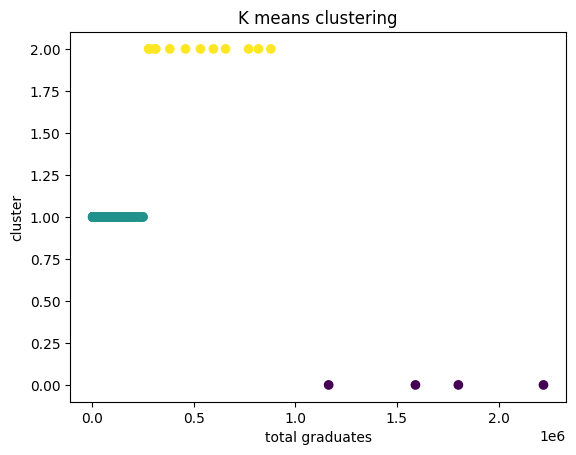

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("cities_r2.csv")
print(df.shape)
print(df.info())

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df[["total_graduates"]]

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scale)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel("Clusters k")
plt.ylabel("wcss")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scale);
print(df[['name_of_city', 'total_graduates', 'Cluster']])

plt.scatter(df['total_graduates'],df['Cluster'], c=df['Cluster'])
plt.title("K means clustering")
plt.xlabel("total graduates")
plt.ylabel("cluster")
plt.show()